In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import nxviz as nv

/Users/WN/opt/anaconda3/lib/python3.7/site-packages/nxviz/__init__.py:29: UserWarning: 
nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  """


### Data Source

https://www.kaggle.com/code/anshulmehtakaggl/starter-notebook-github-organizations/notebook

In [2]:
data = pd.read_csv('./organization.csv') 
data

,Organisation,member
0,ethereum,Oleh Aldekein
1,ethereum,None
2,ethereum,Frank Szendzielarz
3,ethereum,Kolby Moroz Liebl
4,ethereum,Marius van der Wijden
...,...,...
10593,microsoft,Zachary Danz
10594,microsoft,zsy
10595,microsoft,Zuhair Parvez
10596,microsoft,None


### Examining the data

In [3]:
data['Organisation'].unique()

array(['ethereum', 'pytorch', 'udacity', 'firebase', 'flutter',
       'deepmind', 'reactjs', 'huggingface', 'google', 'docker', 'apache',
       'vuejs', 'freeCodeCamp', 'airbnb', 'golang', 'nodejs', 'elastic',
       'laravel', 'aws', 'Azure', 'reduxjs', 'NVIDIA', 'redis', 'rails',
       'grafana', 'jquery', 'ansible', 'graphql', 'babel', 'atom',
       'prometheus', 'django', 'opencv', 'mongodb', 'python', 'bitcoin',
       'plotly', 'serverless', 'nuxt', 'facebook', 'microsoft'],
      dtype=object)

### Working with a select few

In [4]:
companies_i_want = data[(data['Organisation'] == 'microsoft') |
                        (data['Organisation'] == 'NVIDIA') |
                        (data['Organisation'] == 'facebook')
                       ]

companies_i_want['Organisation'].unique()

array(['NVIDIA', 'facebook', 'microsoft'], dtype=object)

In [5]:
companies_i_want

,Organisation,member
5376,NVIDIA,Jonathan Calmels
5377,NVIDIA,Aaron Plattner
5378,NVIDIA,Alex Aizman
5379,NVIDIA,Ben Barsdell
5380,NVIDIA,Davide Rossetti
...,...,...
10593,microsoft,Zachary Danz
10594,microsoft,zsy
10595,microsoft,Zuhair Parvez
10596,microsoft,None


In [6]:
companies_i_want.reset_index(inplace=True, drop=True)

### Still a lot of rows, subsetting the df

In [7]:
companies_i_want = companies_i_want[:300]

In [8]:
G = nx.Graph()
G.add_nodes_from(companies_i_want['Organisation'].unique(), bipartite = 'org')
G.add_nodes_from(companies_i_want['member'], bipartite = 'member')


In [9]:
for i in range(len(companies_i_want)):
    G.add_edge(companies_i_want['member'][i], companies_i_want['Organisation'][i])
         

In [10]:
len(G.nodes())

286

In [11]:
len(G.edges())

284

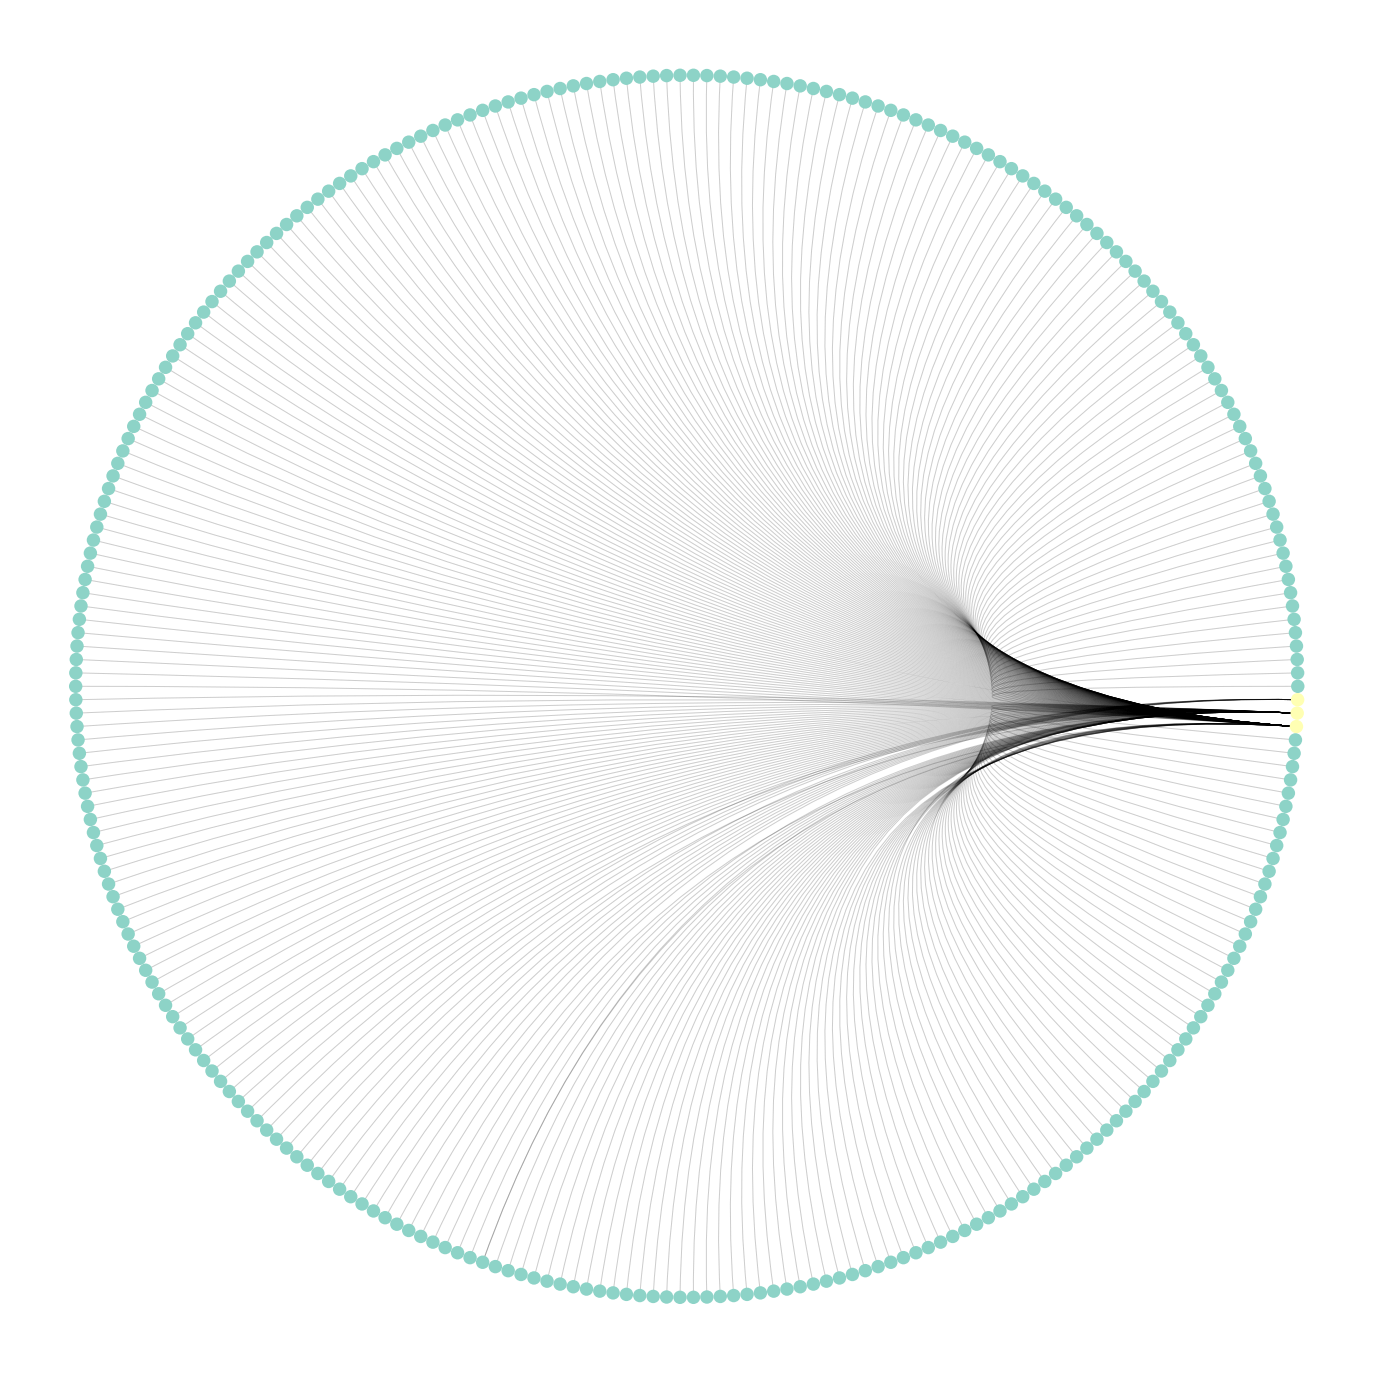

In [21]:
circos_plt = nv.circos(G, node_color_by="bipartite", group_by='bipartite')

circos_plt.draw

plt.rcParams['figure.figsize'] = [100, 50]
plt.show()

In [13]:
G.nodes()['NVIDIA']

{'bipartite': 'org'}

In [14]:
[n for n, d in G.nodes(data=True) if d['bipartite'] == 'org']

['NVIDIA', 'facebook', 'microsoft']